In [158]:
print('Hello world')

Hello world


In [159]:
import pandas as pd

In [160]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [161]:
train.shape,test.shape

((20758, 18), (13840, 17))

In [162]:
train.isnull().sum().sum(),test.isnull().sum().sum()

(0, 0)

In [163]:
train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

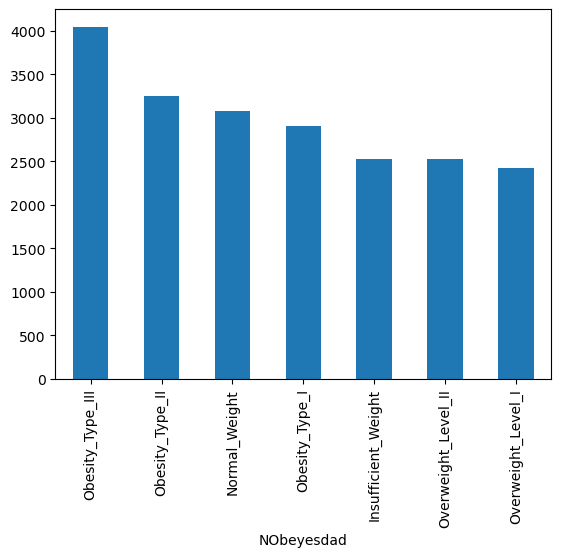

In [164]:
train['NObeyesdad'].value_counts().plot(kind='bar');


In [165]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [166]:
train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [167]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_cols=['Gender','family_history_with_overweight','FAVC','CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for col in cat_cols:
    train[col]=le.fit_transform(train[col])
    test[col]=le.fit_transform(test[col])

train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])

In [168]:
train.describe()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,0.497929,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,1.848299,0.011803,2.029418,0.033096,0.981747,0.616756,1.223239,2.506841,2.991473
std,5992.46278,0.500008,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.449036,0.108000,0.608467,0.178891,0.838302,0.602113,0.473690,1.148730,1.893176
min,0.00000,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5189.25000,0.000000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.792022,0.000000,0.008013,0.000000,1.000000,3.000000,1.000000
50%,10378.50000,0.000000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.573887,1.000000,3.000000,3.000000
75%,15567.75000,1.000000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.549617,0.000000,1.587406,1.000000,1.000000,3.000000,4.000000
max,20757.00000,1.000000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,4.000000,6.000000


In [169]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feat_cols=train.columns.drop(['id','NObeyesdad'])
feat_cols


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [170]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in feat_cols:
    train[col]=scaler.fit_transform(train[col].values.reshape(-1,1))
    test[col]=scaler.transform(test[col].values.reshape(-1,1))
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1.004152,0.105699,-0.002828,-0.235713,0.469099,0.30588,-0.836279,0.314684,0.337845,-0.109287,1.206594,-0.185009,-1.171141,0.597438,-0.471288,0.429319,6
1,1,-0.995866,-1.027052,-1.606291,-1.170931,0.469099,0.30588,-0.836279,0.338364,-1.889204,-0.109287,-0.048349,-0.185009,0.021775,0.636513,1.639846,-2.182324,1
2,2,-0.995866,-1.027052,0.128451,-1.430012,0.469099,0.30588,-1.060332,-1.913423,0.337845,-0.109287,-0.195644,-0.185009,-0.138022,1.755239,1.639846,0.429319,0
3,3,-0.995866,-0.507929,0.120090,1.644770,0.469099,0.30588,1.039171,0.338364,0.337845,-0.109287,-0.584035,-0.185009,0.579896,0.271455,-0.471288,0.429319,4
4,4,1.004152,1.371197,2.450367,0.224054,0.469099,0.30588,0.438397,-1.119801,0.337845,-0.109287,-0.081469,-0.185009,1.176486,0.523111,-0.471288,0.429319,6


In [171]:
X=train.drop(columns=['id','NObeyesdad'],axis=1)
y=train['NObeyesdad']

test.drop(columns=['id'],axis=1,inplace=True)

In [172]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier()

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
scores=cross_val_score(model_DT,X,y,cv=5)
scores


array([0.84128131, 0.84561657, 0.84657996, 0.84871115, 0.84557938])

In [173]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(n_estimators=100,
                             random_state=42,
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

In [174]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
for train_idx,test_idx in kf.split(X,y):
    X_train,X_test=X.iloc[train_idx],X.iloc[test_idx]
    y_train,y_test=y.iloc[train_idx],y.iloc[test_idx]
    model_RF.fit(X_train,y_train)
    pred=model_RF.predict(X_test)
    print(f"Accuracy score: {accuracy_score(y_test,pred)}")

Accuracy score: 0.9070327552986512
Accuracy score: 0.8942678227360308
Accuracy score: 0.905587668593449
Accuracy score: 0.8944832570464948
Accuracy score: 0.8976150325222838


In [175]:
model_RF.fit(X,y)

RandomForestClassifier(random_state=42)

## Neural Network

In [206]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(128,input_shape=(X.shape[1],),activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16,activation='tanh'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(7,activation='softmax')
    ])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               2176      
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 16)               

In [177]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=20,monitor='val_loss',restore_best_weights=True)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # compile means to configure the model for training


In [178]:
model.fit(X,y,epochs=300,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/300


519/519 [==============================] - 4s 5ms/step - loss: 0.9482 - accuracy: 0.6277 - val_loss: 0.5604 - val_accuracy: 0.7852
Epoch 2/300
519/519 [==============================] - 2s 4ms/step - loss: 0.6007 - accuracy: 0.7673 - val_loss: 0.4428 - val_accuracy: 0.8367
Epoch 3/300
519/519 [==============================] - 3s 5ms/step - loss: 0.5371 - accuracy: 0.7931 - val_loss: 0.4114 - val_accuracy: 0.8471
Epoch 4/300
519/519 [==============================] - 3s 5ms/step - loss: 0.4950 - accuracy: 0.8146 - val_loss: 0.3996 - val_accuracy: 0.8589
Epoch 5/300
519/519 [==============================] - 3s 5ms/step - loss: 0.4694 - accuracy: 0.8323 - val_loss: 0.3844 - val_accuracy: 0.8646
Epoch 6/300
519/519 [==============================] - 3s 6ms/step - loss: 0.4570 - accuracy: 0.8348 - val_loss: 0.3761 - val_accuracy: 0.8702
Epoch 7/300
519/519 [==============================] - 3s 5ms/step - loss: 0.4448 - accuracy: 0.8395 - val_loss: 0.3854 - val_accuracy: 0.8716
Epoch 8/300

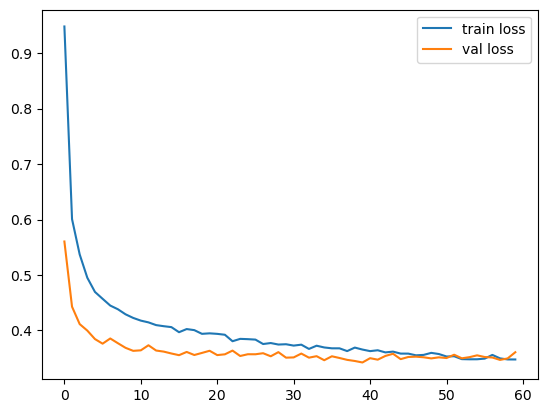

In [184]:
history=model.history.history
import matplotlib.pyplot as plt
plt.plot(history['loss'],label='train loss')
plt.plot(history['val_loss'],label='val loss')
plt.legend()
plt.show()

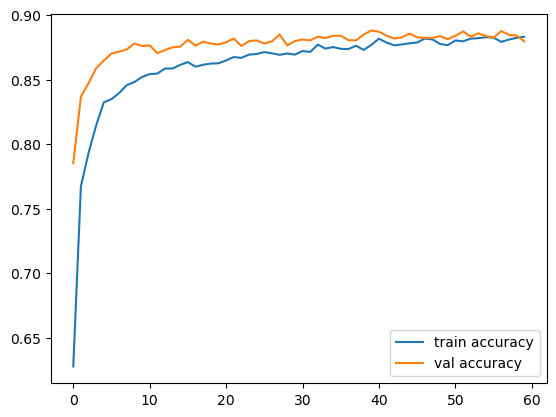

In [186]:
plt.plot(history['accuracy'],label='train accuracy')
plt.plot(history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

In [212]:
y_pred=model.predict(test)

433/433 [==============================] - 2s 4ms/step


In [217]:
submission=pd.read_csv('sample_submission.csv')
submission['NObeyesdad']=le.inverse_transform(y_pred.argmax(axis=1))
submission.to_csv('submission.csv',index=False)


In [218]:
submission.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Overweight_Level_II
4,20762,Obesity_Type_III
